In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import math as m
import numpy as np

In [7]:
#Input Variables

#Camera Position
camX = 3.25
camY = 13.5
camAngle = 90.0

#Robot Position
yaw = -90.0
targetYaw = -90.0
w = 26
l = 21

#Piecewise Inputs
offset = 20
#x_offset = offset * m.sin(m.radians(targetYaw)) #INCORRECT
#y_offset = offset * m.cos(m.radians(targetYaw)) #INCORRECT
x_offset = offset * m.cos(m.radians(targetYaw+camAngle))
y_offset = offset * m.sin(m.radians(targetYaw+camAngle))

#Pyeye Outputs
bearing = -5
dist = 45.19

#Transfer Function
m1 = 1.2449
b = -4.3949

dist = dist * m1 + b

In [8]:
#Calculate Change in Cam position with YAW

#Current Posiiton (swerve coords)
x_cur = camX * m.cos(m.radians(yaw)) - camY * m.sin(m.radians(yaw))
y_cur = camY * m.cos(m.radians(yaw)) + camX * m.sin(m.radians(yaw))

#Final Position (swerve coords)
x_final = camX * m.cos(m.radians(targetYaw)) - camY * m.sin(m.radians(targetYaw))
y_final = camY * m.cos(m.radians(targetYaw)) + camX * m.sin(m.radians(targetYaw))

#Change in Position
dX = x_final - x_cur
dY = y_final - y_cur

In [9]:
#Calculate Final Heading

#Heading direct from pyeye
heading_init = bearing + yaw + camAngle
x_init = dist * m.cos(m.radians(heading_init))
y_init = dist * m.sin(m.radians(heading_init))

#Heading with correction
x_corr = x_init - dX
y_corr = y_init - dY
heading_final = m.degrees(m.atan2(y_corr , x_corr))
range_final = m.sqrt(x_corr**2 + y_corr**2)

#Piecewise Transform -- OLD
#theta_new = heading_final - camAngle
#x_new = range_final * m.sin(m.radians(theta_new)) - x_offset
#y_new = range_final * m.cos(m.radians(theta_new)) - y_offset
##Segment 1 Heading/Range
#chi_new = m.degrees(m.atan2(x_new, y_new)) + camAngle #Heading
#range_new = m.sqrt(x_new**2 + y_new**2)
##Segment 2 Heading/Range
#straight_heading = targetYaw + camAngle
#straight_range = offset

#CORRECTED:
##Segment 1
x_piece = x_corr - x_offset
y_piece = y_corr - y_offset
heading_piece = m.degrees(m.atan2(y_piece, x_piece))
range_piece = m.sqrt(x_piece**2 + y_piece**2)
##Segment 2
straight_heading = targetYaw + camAngle
straight_range = offset

In [10]:
#Calculate Points needed for Graph

#Wheel Positions Initial [0,1,3,2,0]
wx_init = np.array([l/2 * m.cos(m.radians(yaw)) + w/2 * m.sin(m.radians(yaw)), 
                   l/2 * m.cos(m.radians(yaw)) - w/2 * m.sin(m.radians(yaw)),
                  -l/2 * m.cos(m.radians(yaw)) - w/2 * m.sin(m.radians(yaw)),
                  -l/2 * m.cos(m.radians(yaw)) + w/2 * m.sin(m.radians(yaw)),
                   l/2 * m.cos(m.radians(yaw)) + w/2 * m.sin(m.radians(yaw))])
wy_init = np.array([-w/2 * m.cos(m.radians(yaw)) + l/2 * m.sin(m.radians(yaw)),
                    w/2 * m.cos(m.radians(yaw)) + l/2 * m.sin(m.radians(yaw)),
                    w/2 * m.cos(m.radians(yaw)) - l/2 * m.sin(m.radians(yaw)),
                   -w/2 * m.cos(m.radians(yaw)) - l/2 * m.sin(m.radians(yaw)),
                   -w/2 * m.cos(m.radians(yaw)) + l/2 * m.sin(m.radians(yaw))])

#Wheel Positions Final [0,1,3,2,0]
wx_final = wx_init * m.cos(m.radians(targetYaw - yaw)) - wy_init * m.sin(m.radians(targetYaw - yaw)) + x_corr
wy_final = wy_init * m.cos(m.radians(targetYaw - yaw)) + wx_init * m.sin(m.radians(targetYaw - yaw)) + y_corr

#Wheel Positions No Correction [0,1,3,2,0]
wx_final_2 = wx_init * m.cos(m.radians(targetYaw - yaw)) - wy_init * m.sin(m.radians(targetYaw - yaw)) + x_init
wy_final_2 = wy_init * m.cos(m.radians(targetYaw - yaw)) + wx_init * m.sin(m.radians(targetYaw - yaw)) + y_init

#Target Position
xcam = dist * m.cos(m.radians(bearing))
ycam = dist * m.sin(m.radians(bearing))
xrobot = xcam * m.cos(m.radians(camAngle)) - ycam * m.sin(m.radians(camAngle)) + camX
yrobot = ycam * m.cos(m.radians(camAngle)) + xcam * m.sin(m.radians(camAngle)) + camY
xswerve = xrobot * m.cos(m.radians(yaw)) - yrobot * m.sin(m.radians(yaw))
yswerve = yrobot * m.cos(m.radians(yaw)) + xrobot * m.sin(m.radians(yaw))


#Lines for Headings, start @ camera current position (x_cur, y_cur)

#With Heading correction - end point
cx_final = x_cur + x_corr
cy_final = y_cur + y_corr

#Without Heading correction - end point
cx_final_2 = x_cur + x_init
cy_final_2 = y_cur + y_init

#Heading Piecewise
##First Segment
#x_adj = range_new * m.cos(m.radians(chi_new))
#y_adj = range_new * m.sin(m.radians(chi_new))
cx_adjust = x_cur + x_piece
cy_adjust = y_cur + y_piece
##Second Segment
cx_final_3 = cx_adjust + offset * m.cos(m.radians(straight_heading))
cy_final_3 = cy_adjust + offset * m.sin(m.radians(straight_heading))

Piecewise Segment 1: Heading: -8.12, Range: 31.99
Piecewise Segment 2: Heading: 0.00, Range: 20.00
Final Heading: -5.00
Final Range: 51.86
Initial Heading: -5.00
Initial range: 51.86
dX: 0.00
dY: 0.00
Current X: 13.50
Current Y: -3.25
Final X: 13.50
Final Y: -3.25
Corrected X: 51.66
Corrected Y: -4.52
Heading X: 51.66
Heading Y: -4.52


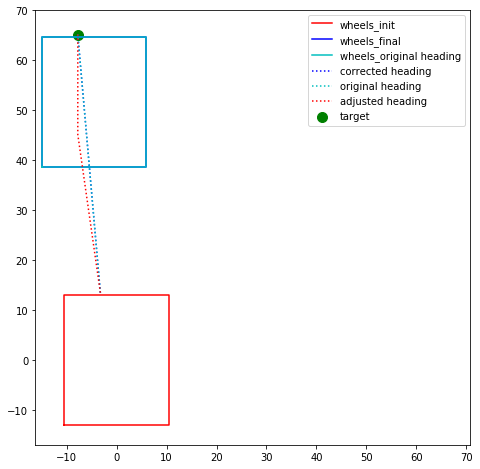

In [11]:
#Plot Results
plt.figure(figsize=(8,8))

#Wheels
plt.plot(wy_init, wx_init, 'r', label='wheels_init')
plt.plot(wy_final,wx_final, 'b', label='wheels_final')
plt.plot(wy_final_2, wx_final_2, 'c', label='wheels_original heading')

#Target
plt.scatter(yswerve, xswerve, color='g', s = 100, label='target')

#Headings
plt.plot([y_cur, cy_final], [x_cur, cx_final], 'b:', label='corrected heading')
plt.plot([y_cur, cy_final_2], [x_cur, cx_final_2], 'c:', label='original heading')
plt.plot([y_cur, cy_adjust, cy_final_3],[x_cur, cx_adjust, cx_final_3],'r:',label='adjusted heading')


plt.legend()
plt.axis('square')


print(f'Piecewise Segment 1: Heading: {heading_piece:.2f}, Range: {range_piece:.2f}')
print(f'Piecewise Segment 2: Heading: {straight_heading:.2f}, Range: {straight_range:.2f}')
print(f'Final Heading: {heading_final:.2f}')
print(f'Final Range: {range_final:.2f}')
print(f'Initial Heading: {heading_init:.2f}')
print(f'Initial range: {dist:.2f}')
print(f'dX: {dX:.2f}')
print(f'dY: {dY:.2f}')
print(f'Current X: {x_cur:.2f}')
print(f'Current Y: {y_cur:.2f}')
print(f'Final X: {x_final:.2f}')
print(f'Final Y: {y_final:.2f}')
print(f'Corrected X: {x_corr:.2f}')
print(f'Corrected Y: {y_corr:.2f}')


print(f'Heading X: {x_init:.2f}')
print(f'Heading Y: {y_init:.2f}')